# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #Visualization
import seaborn as sns            #Visualization

#Petro.csv data is read to petroset
petroset=pd.read_csv('petrol.csv', header=0)

In [2]:
print('stats for the petrol.csv dataset as listed below:')
petroset.describe()

stats for the petrol.csv dataset as listed below:


,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [3]:
petroset.dtypes #checking the datatype

tax             float64
 income           int64
 highway          int64
 dl             float64
 consumption      int64
dtype: object

In [5]:
Q1 = petroset.quantile(.25)  # 25th percentile
Q3 = petroset.quantile(.75)  # 75th perventile
IQR = Q3-Q1                  # Inter quantile range (IQR)
Mincap=Q1-(1.5*IQR)          # Min cap at 25th - 1.5 time IQR
Maxcap = Q3+(1.5*IQR)        # Max cap at 75th + 1.5 time IQR
newpetro = petroset.where((petroset>=Mincap) & (petroset<=Maxcap))  # Max:Min capped dataset is stored in newpetro dataset
newpetro.dropna(axis=0, how='any',inplace = True )      # Removing the outliers outside max and min capped dataset
newpetro.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976.0,0.525,541.0
1,9.0,4092,1250.0,0.572,524.0
2,9.0,3865,1586.0,0.580,561.0
3,7.5,4870,2351.0,0.529,414.0
4,8.0,4399,431.0,0.544,410.0


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [15]:
newpetro.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


We can see that "Consumption" and "dl" has 61% positive coorelation and negative corelation for tax,income at (-)45% and (-)35%
This means Consumption increases, if "dl" increases and reduces when "tax" and "income" increases


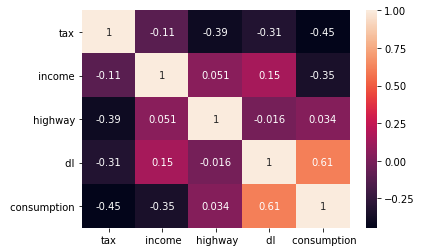

In [17]:
print('We can see that "Consumption" and "dl" has 61% positive coorelation and negative corelation for tax,income at (-)45% and (-)35%')
print('This means Consumption increases, if "dl" increases and reduces when "tax" and "income" increases')
sns.heatmap(newpetro.corr(),annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [6]:
from sklearn.model_selection import train_test_split   #For Test and Train split
from sklearn import linear_model                       #Linear Regression
from sklearn.metrics import mean_squared_error         #mean_squared_error
from math import sqrt

#Divided the data into fearure/input(X) and target/predict(Y) dataset
X = newpetro[[' dl','tax']]     #Considering first two higher correlated variable w.r.t Consumption
Y = newpetro[' consumption']    #Considering 'Consumption' as perdiect/target variable

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [182]:
#Dataset is now split into 80% training and 20% testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=.80,test_size=0.2, random_state=7)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [183]:
regr =linear_model.LinearRegression()
pre = regr.fit(X_train,Y_train)       # regression fit for X_train, Y_train
m=regr.coef_                    #Coefficient, in this case we will have two coeff
c=regr.intercept_
print('The coefficients for 2 input variables are', m[0],'and',m[1])
feature_cols = X_train.columns
Dat=pd.DataFrame([feature_cols,m],index={"Columns","Coefficients"}).T
Dat

The coefficients for 2 input variables are 1065.4254226362957 and -25.49572645473845


,Columns,Coefficients
0,dl,1065.43
1,tax,-25.4957


#R-Square 

In [184]:
y_pred = regr.predict(X_train)
mse = mean_squared_error(Y_train, y_pred)
rmse = sqrt(mse)
print('r2 (R square) is:',rmse)

r2 (R square) is: 61.82824845368664


# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [185]:
print('Accuracy score for the model (train Dataset) is:', regr.score(X_train,Y_train))

Accuracy score for the model (train Dataset) is: 0.511839364454702


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [177]:
X1 = newpetro[[' dl','tax',' highway',' income']]
Y1 = newpetro[' consumption']
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,train_size=.80,test_size=.20,random_state=7)

In [187]:
alpre=regr.fit(X1_train,Y1_train)
y_alpredict=alpre.predict(X1_train)
y_pred = regr.predict(X1_train)
mse = mean_squared_error(Y1_train, y_pred)
rmse = sqrt(mse)
print('r2 (R square) for train dataset is:',rmse)
print('Accuracy score post adding income and Highway varaible with train dataset', alpre.score(X1_train,Y1_train))

r2 (R square) for train dataset is: 48.09264875910262
Accuracy score post adding income and Highway varaible with train dataset 0.7046436836953848


# Question 9: Print the coefficients of the multilinear regression model

In [224]:
m=alpre.coef_
print('Coefficients post including income and Highwy varaibles are listed below:')
pd.DataFrame([X1_train.columns,m],index={'Variables','Coefficients'}).T

Coefficients post including income and Highwy varaibles are listed below:


,Variables,Coefficients
0,dl,1072.39
1,tax,-34.2597
2,highway,-0.00309447
3,income,-0.0657771


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [8]:
print('we can observe that post including additional vairables the accuracy increases and variance reduces')

we can observe that post including additional vairables the accuracy increases and variance reduces
